# 1. Passive learning without random policy

We set a discount factor $\gamma = 0.95$ as we consider that future reward are very important. However, we don't set $\gamma = 0.95$ as we want to penalize state that are far from the solution

In [1]:
from environment import SimpleMazeObstacle
from agent import PassiveAgentTD

row, col = 10, 20
#
env = SimpleMazeObstacle(row, col,ratio_obstacles=0.5)
env.reset()
env.render()

0    |#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|
1    |#|#|.|P|P|P|.|#|P|.|P|.|P|.|P|P|.|.|R|#|
2    |#|#|.|#|.|#|R|#|.|#|.|#|.|#|#|#|#|#|.|#|
3    |#|#|R|#|P|#|R|#|.|#|.|#|P|#|.|.|.|#|.|#|
4    |#|#|#|#|.|#|#|#|.|#|.|#|#|#|.|#|.|#|P|#|
5    |#|#|.|.|.|#|.|.|.|#|E|#|.|.|.|#|.|#|.|#|
6    |#|#|.|#|#|#|.|#|#|#|P|#|.|#|#|#|.|#|.|#|
7    |#|#|.|.|.|.|.|.|.|#|.|P|.|.|C|P|.|#|.|#|
8    |#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|
9    |#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|#|



In [1]:
agent = PassiveAgentTD(env, 100, gamma=0.95, debug=False)
agent.learning()
agent.print_u_table()

NameError: name 'PassiveAgentTD' is not defined

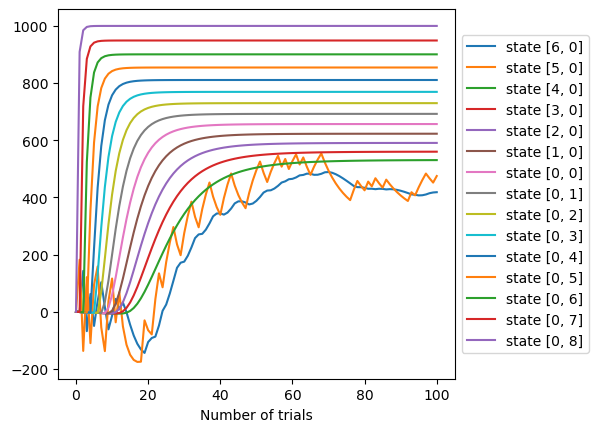

In [3]:
import matplotlib.pyplot as plt
utilities = agent.get_utilities()
visited_states = agent.get_visited_state()

fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(visited_states)):
    plt.plot(utilities[i], label="state "+str(visited_states[i]))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Number of trials")
plt.show()

In [4]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        
0  656.68   692.3    729.79   769.26   810.8    854.52   900.55   949.0    1000.0            
1  622.83                                                                                    
2  590.64                                                                                    
3  559.94                                                                                    
4  530.53                                                                                    
5  474.78                                                                                    
6  418.24                                                                                    


# 2. Passive learning with a random policy

In [5]:
from environment import SimpleMaze
from agent import PassiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

tensor(0) |.|.|.|.|.|.|.|.|.|.|.|E|
tensor(1) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(2) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(3) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(4) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(5) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(6) |C|.|.|.|.|.|.|.|.|.|.|.|



In [8]:
agent = PassiveAgentTD(env, 500, seed=0, gamma=0.95, random_policy=True, debug=False)
agent.learning()

learning completed


In [3]:
a = [1, 2, 3, 8]
print(a.pop(0))

1


In [6]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  656.68   692.3    729.79   769.26   810.8    854.52   900.55   949.0    1000.0                              
1  622.83                                                                                                      
2  590.64                                                                                                      
3  559.94                                                                                                      
4  530.53                                                                                                      
5  474.78                                                                                                      
6  418.24                                                                                                      


# 3. Active learning with Q-function

In [7]:
from environment import SimpleMaze
from agent import ActiveAgentQLearning

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

tensor(0) |.|.|.|.|.|.|.|.|.|.|.|E|
tensor(1) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(2) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(3) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(4) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(5) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(6) |C|.|.|.|.|.|.|.|.|.|.|.|



In [8]:
agent = ActiveAgentQLearning(env, 200, q_min=2000, n_min=20, gamma=0.95, debug=False)
agent.learning()

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

## utility for each state

In [10]:
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        print("{:<8}".format(str(round(utilities[i*col + j].item(), 2))), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  536.28   582.24   620.39   656.11   692.19   729.78   769.25   810.8    854.52   900.55   949.0    1000.0   
1  531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   810.8    854.52   900.55   949.0    
2  503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   810.8    854.52   900.55   
3  477.43   503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   810.8    854.52   
4  452.56   477.43   503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   810.8    
5  428.93   452.56   477.43   503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   769.26   
6  406.48   428.93   452.56   477.43   503.61   531.17   560.18   590.71   622.85   656.69   692.3    729.79   


## State representation

In [11]:
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        print("{:<8}".format(str(i*col + j)), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  0        1        2        3        4        5        6        7        8        9        10       11       
1  12       13       14       15       16       17       18       19       20       21       22       23       
2  24       25       26       27       28       29       30       31       32       33       34       35       
3  36       37       38       39       40       41       42       43       44       45       46       47       
4  48       49       50       51       52       53       54       55       56       57       58       59       
5  60       61       62       63       64       65       66       67       68       69       70       71       
6  72       73       74       75       76       77       78       79       80       81       82       83       


# Maze environment

In [1]:
from environment import Maze

env = Maze(13, 30)
env.render()

##############################
##........E............#.....#
####.#################.#.#.###
##...#.......#.....#.#.#.#...#
##.#.#.#####.#.###.#.#.#####.#
##.#.#.#...#...#...#.#.......#
##.###.#.#######.###.#######.#
##.....#.......#.#.......#...#
##.#######.#.###.#####.#.#.###
##.....#...#.#...#.....#.#...#
######.#.#.###.###.#########.#
##.......#.#S..#.............#
##############################


In [4]:
test = [1, 0]
a = [1, 1]
a[1] = 0
print(a == test)

True


In [1]:
ACTIONS: dict = {  # we define the different actions doable
    "north": (-1, 0),
    "east": (0, 1),
    "south": (1, 0),
    "west": (0, -1)
}

In [6]:
list(ACTIONS.keys())

['north', 'east', 'south', 'west']

In [2]:
import torch
print(torch.__version__)

1.13.1


In [4]:
from environment import SimpleMaze

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

tensor(0) |.|.|.|.|.|.|.|.|.|.|.|E|
tensor(1) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(2) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(3) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(4) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(5) |.|.|.|.|.|.|.|.|.|.|.|.|
tensor(6) |C|.|.|.|.|.|.|.|.|.|.|.|



In [5]:
random_platter_size_tensor=torch.rand(row,col)
random_platter_size_tensor

tensor([[0.8712, 0.3490, 0.5494, 0.8370, 0.0984, 0.9148, 0.0875, 0.1789, 0.6384,
         0.9121, 0.8085, 0.4841],
        [0.8023, 0.2046, 0.4749, 0.4458, 0.8532, 0.8966, 0.9137, 0.9911, 0.5912,
         0.5649, 0.0973, 0.9772],
        [0.5763, 0.1942, 0.1925, 0.8632, 0.1752, 0.9183, 0.4412, 0.6103, 0.0069,
         0.9803, 0.5939, 0.4207],
        [0.8556, 0.8477, 0.6523, 0.0586, 0.2971, 0.2602, 0.7214, 0.1418, 0.8121,
         0.5836, 0.4991, 0.8388],
        [0.6451, 0.9253, 0.9934, 0.2651, 0.1714, 0.0234, 0.5350, 0.6032, 0.4319,
         0.1584, 0.4046, 0.7860],
        [0.8389, 0.5281, 0.3299, 0.2878, 0.9219, 0.6834, 0.6923, 0.1248, 0.8896,
         0.7722, 0.6689, 0.4704],
        [0.7400, 0.8827, 0.9935, 0.1944, 0.7632, 0.1858, 0.2195, 0.3893, 0.4844,
         0.5736, 0.4140, 0.9549]])

In [6]:
random_platter_size_tensor.ndim

2

In [7]:
print(f"Minimum: {random_platter_size_tensor.min()}")
print(f"Maximum: {random_platter_size_tensor.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {random_platter_size_tensor.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {random_platter_size_tensor.sum()}")

Minimum: 0.006852984428405762
Maximum: 0.9934551119804382
Mean: 0.5598763227462769
Sum: 47.02960968017578


In [8]:
grille = []
for i in range(3):
    row = []
    for j in range(3):
        row.append(0)
    grille.append(row)

In [9]:
grille

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [21]:
import torch
GRILLE = torch.zeros((3,3), dtype=torch.int)
GRILLE[0][0].item()

tensor(True)

In [25]:
t = [1,2]

In [26]:
t[1]

2

In [35]:
x=10
rand_int = torch.randint(0, x, size=(1,)).item()

print(rand_int)

6


In [240]:
grid = torch.zeros((3,3), dtype=torch.int)
grid[0][0].item()
character_pos = [0,0]

0

In [226]:
free_place = []
character_pos = [0,0]
grid[0][0] = 5

for i in torch.arange(3):
    for j in torch.arange(3):
       # print("La valeur de ",i.item(),",",j.item(),":",grid[i][j].item())
       if [i,j] == character_pos :
        continue
       if grid[i][j].item() == 0:
            free_place.append([i.item(),j.item()])

place_obstacle =[]
type_obstacle =[]
random.shuffle(free_place) #ressort la liste mélanger

for i in range(int(len(free_place)/2)):
    place_obstacle.append(free_place.pop(0)) #supprime premier élément et le choisis
    type_obstacle.append(torch.randint(1, 3, size=(1,)).item()) # ici jsp pq on met 3 et pas 2

for i in range(len(place_obstacle)):
    grid[place_obstacle[i][0]][place_obstacle[i][1]] = type_obstacle[i]

print("generation finie")

generation finie


In [227]:
 grid

tensor([[5, 2, 0],
        [1, 2, 0],
        [0, 0, 2]], dtype=torch.int32)

In [147]:


free_place=[0,1,2,3,4,5,6,7,8,9]
place_obstacle =[]
type_obstacle =[]
random.shuffle(free_place) #ressort la liste mélanger

for i in range(int(number_free_place/2)):
    place_obstacle.append(free_place.pop(0)) #supprime premier élément et le choisis
    type_obstacle.append(torch.randint(1, 3, size=(1,)).item()) # ici jsp pq on met 3 et pas 2


In [148]:
place_obstacle

[9, 2, 3, 8, 4]

In [149]:
type_obstacle

[1, 2, 1, 2, 2]

3

In [96]:
for i in range(10):
    if i % 2 == 0:
        print(i)
        i += 1
    else:
        print("pas pair")
        continue


0
pas pair
2
pas pair
4
pas pair
6
pas pair
8
pas pair


In [ ]:
grid = torch.zeros((3,3), dtype=torch.int)

character_pos = [0,0]

grid[character_pos[0],character_pos[1]] == 1
    return -200
grid[character_pos[0],character_pos[1]] == 2
    return +200